<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/offshoreproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 0.8810353409656545
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       303
           1       0.79      0.78      0.78       285
           2       0.94      0.99      0.96       277
           3       0.80      0.80      0.80       283
           4       0.80      0.69      0.74       287
           5       0.95      0.96      0.96       291
           6       0.93      0.99      0.96       283

    accuracy                           0.88      2009
   macro avg       0.88      0.88      0.88      2009
weighted avg       0.88      0.88      0.88      2009

Confusion Matrix:
 [[293   1   0   5   2   0   2]
 [  7 222   9  15  20   5   7]
 [  1   3 273   0   0   0   0]
 [  5  16   3 225  24   5   5]
 [  5  39   3  31 197   4   8]
 [  3   1   2   4   2 279   0]
 [  0   0   0   1   1   0 281]]


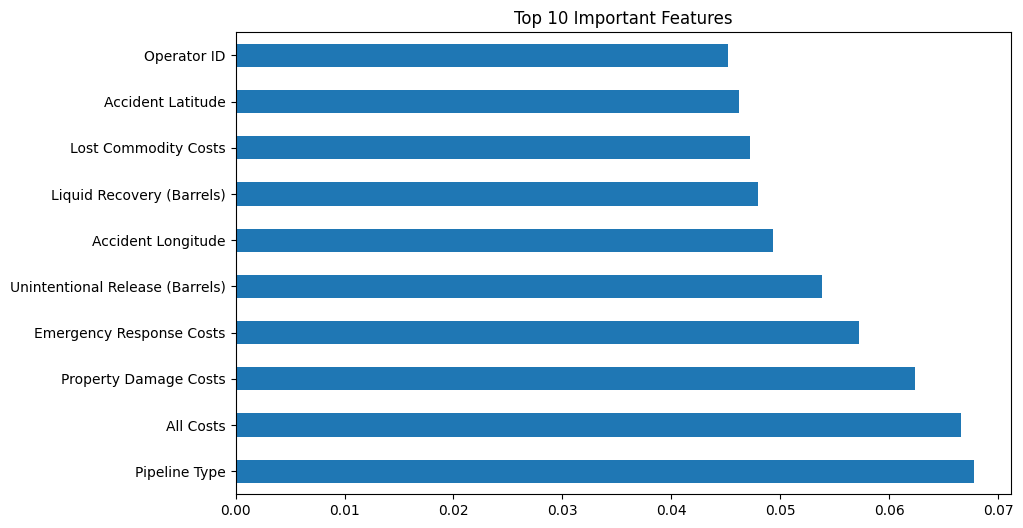

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
data = pd.read_csv('database.csv')


# Drop columns with too many missing values
data = data.drop(columns=['Liquid Name', 'Operator Employee Injuries', 'Operator Contractor Injuries',
                          'Emergency Responder Injuries', 'Other Injuries', 'Public Injuries', 'All Injuries',
                          'Operator Employee Fatalities', 'Operator Contractor Fatalities',
                          'Emergency Responder Fatalities', 'Other Fatalities', 'Public Fatalities', 'All Fatalities'])

# Filling missing values
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encoding categorical variables
le = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Selecting features and target
y = data['Cause Category']  # Target variable
X = data.drop(columns=['Cause Category', 'Cause Subcategory', 'Accident Date/Time', 'Report Number', 'Supplemental Number'])

# Handling class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
